In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/assessment')

Mounted at /content/drive


In [2]:
!pip install tqdm

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Step 1: Clean and prepare the datasets 

In [4]:
import pandas as pd

jobtitle_seniority = pd.read_csv('jobtitle_seniority.csv', encoding='utf-8')
positions = pd.read_csv('positions.csv', encoding='utf-8')
education = pd.read_csv('education.csv', encoding='utf-8')

## clean `position` dataset

In [5]:
positions = pd.read_csv('positions.csv', encoding='utf-8')

In [6]:
import numpy as np
from datetime import date

today = date.today()

#replace nan to today's date, as it is probable that having no enddate means it is the user_id's current position.
positions['enddate'] = positions['enddate'].replace(np.nan, today) 


In [7]:
#convert to datetime
positions['startdate'] = pd.to_datetime(positions['startdate'])
positions['enddate'] = pd.to_datetime(positions['enddate'])


In [8]:
df_end = positions.groupby('user_id').max().reset_index()[['user_id','enddate']]

In [9]:
df_start = positions.groupby('user_id').min().reset_index()[['user_id','startdate']]

In [10]:
#to calculate the total career duration, i selected MIN value of work startdate and MAX value of work enddate
df_startend = df_start.merge(df_end, how = 'left', on = 'user_id')

In [11]:
#testing 
df_startend[df_startend['user_id']=='++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==']

,user_id,startdate,enddate
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,1997-12-01,2022-04-16


In [12]:
#create a new column for the number of work years.

df_startend['workyear'] = df_startend['enddate'] - df_startend['startdate']
df_startend['workyear'] 

0       25307 days
1       13711 days
2        2876 days
3        4672 days
4        8902 days
           ...    
81459   11170 days
81460    6467 days
81461    9967 days
81462   11063 days
81463    2723 days
Name: workyear, Length: 81464, dtype: timedelta64[ns]

In [13]:
from tqdm import tqdm
for i in tqdm(range(len(df_startend))):
  df_startend.loc[i,'workyear'] = df_startend.loc[i,'workyear'].days

100%|██████████| 81464/81464 [03:13<00:00, 421.31it/s]


In [14]:
df_startend 


,user_id,startdate,enddate,workyear
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,1953-01-01,2022-04-16,25307
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,1984-10-01,2022-04-16,13711
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,2014-06-01,2022-04-16,2876
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,2009-07-01,2022-04-16,4672
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,1997-12-01,2022-04-16,8902
...,...,...,...,...
81459,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,1966-08-01,1997-03-01,11170
81460,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,2004-08-01,2022-04-16,6467
81461,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,1995-01-01,2022-04-16,9967
81462,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,1992-01-01,2022-04-16,11063


In [15]:
#I selected workyear only greater than zero, because there were some raw data that had enddate earlier than startdate,
# resulting in having negative values of workyear. (ie. startdate was in 2014 but enddate was 2004.)

df_startend = df_startend[df_startend['workyear']>0]

In [16]:
#likewise, I also excluded extreme startdate values such as 1920s, 
#as it is very unlikely that a user_id who started work in 1920 will still be working now.

df_startend = df_startend[ df_startend['workyear'] < 15000]


In [17]:
#change the names of startdate, enddate columns as these variables appear in Education csv file as well. 
df_startend = df_startend.rename(columns={'startdate': 'work_startdate', 'enddate': 'work_enddate'})

In [18]:
#covert the number of days to the number of years by dividing by 365 days/year

df_startend['workyear'] = (df_startend['workyear'])/365

df_startend

,user_id,work_startdate,work_enddate,workyear
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,1984-10-01,2022-04-16,37.564384
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,2014-06-01,2022-04-16,7.879452
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,2009-07-01,2022-04-16,12.8
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,1997-12-01,2022-04-16,24.389041
5,++8qqHNDQSyp1Yd45ROBZg5+2cvffV/mNepQVJd0smgtpB...,2000-01-01,2022-04-16,22.30411
...,...,...,...,...
81459,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,1966-08-01,1997-03-01,30.60274
81460,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,2004-08-01,2022-04-16,17.717808
81461,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,1995-01-01,2022-04-16,27.306849
81462,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,1992-01-01,2022-04-16,30.309589


In [19]:
df_startend

,user_id,work_startdate,work_enddate,workyear
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,1984-10-01,2022-04-16,37.564384
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,2014-06-01,2022-04-16,7.879452
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,2009-07-01,2022-04-16,12.8
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,1997-12-01,2022-04-16,24.389041
5,++8qqHNDQSyp1Yd45ROBZg5+2cvffV/mNepQVJd0smgtpB...,2000-01-01,2022-04-16,22.30411
...,...,...,...,...
81459,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,1966-08-01,1997-03-01,30.60274
81460,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,2004-08-01,2022-04-16,17.717808
81461,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,1995-01-01,2022-04-16,27.306849
81462,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,1992-01-01,2022-04-16,30.309589


## clean `education` dataset

In [20]:
education = pd.read_csv('education.csv', encoding='utf-8')

In [21]:
education = education.rename(columns={'startdate': 'school_startdate', 'enddate': 'school_enddate'})

In [22]:
education['major'] =education['major'].str.lower()

In [23]:
#drop missing values.
education = education.dropna(subset = ['major'])
education = education.dropna(subset = ['school_startdate'])

In [24]:
education

,user_id,major,school_startdate,school_enddate
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,master of viticulture,2006-01-01,2008-01-01
1,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,bachelor of horticulture,2001-01-01,2005-01-01
2,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,wset level 3,2015-01-01,2015-01-01
3,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,graduated diploma,2008-01-01,2009-01-01
4,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,lingüística aplicada en la enseñanza del inglé...,2013-01-01,2016-01-01
...,...,...,...,...
226177,T7lG/nB8PM+lLHLXwfqD0w4ZM3TcQvn1bQ/jHgHWG0kf/b...,phd,2002-01-01,2008-01-01
226178,kTlIZZU3vXt4Q90RzMQUAQ5+2cvffV/mNepQVJd0smgtpB...,economista con énfasis en admnistración de emp...,1991-01-01,1997-01-01
226179,aGjVX+XXGchYAvFGnSzsiA4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor&#39;s degree,1985-01-01,1990-01-01
226180,b4QpP+7Znqa9aGluCEMJKQ5+2cvffV/mNepQVJd0smgtpB...,master's degree,2016-01-01,2017-01-01


In [25]:
#I chose to work only with bachelor's degree, as most people start bachelor's degree when they graduated from high school at age 18,
#and it is more systematic to use this fact to calcuate age.
# I did not use master's or phd to predict age, because the starting age for these degrees varies greatly and it is difficult to generalize.
# I did not use high school info, as there are only 3500 data available, and for simplicity, decided to only use bachelor's info. 

print('Bachelor:', education.major.str.contains(r'bachelor').sum())
print('Master:', education.major.str.contains(r'master').sum())
print('high school:', education.major.str.contains(r'high school').sum())
print('phD:', education.major.str.contains(r'phd').sum())

Bachelor: 34094
Master: 17288
high school: 3524
phD: 1402


In [26]:
education_bc = education[education['major'].str.contains('bachelor')]

In [27]:
education_bc['school_startdate'] = pd.to_datetime(education_bc['school_startdate'])
education_bc['school_enddate'] = pd.to_datetime(education_bc['school_enddate'])


In [28]:
#calculate duration of studies 

education_bc['studyyear'] = education_bc['school_enddate'] - education_bc['school_startdate']

#indexing
education_bc.index = range(len(education_bc))

In [29]:
from tqdm import tqdm
for i in tqdm(range(len(education_bc))):
  education_bc.loc[i,'studyyear'] = education_bc.loc[i,'studyyear'].days / 365

100%|██████████| 34094/34094 [00:39<00:00, 861.16it/s] 


In [30]:
#among the user_ids, I chose to work only with users who went to university for more than two years and less than 7 years.
education_bc = education_bc[education_bc['studyyear']<7]
education_bc = education_bc[education_bc['studyyear']>2]
education_bc = education_bc.drop_duplicates(subset=['user_id'])
education_bc.index = range(len(education_bc))

In [31]:
from datetime import date
import datetime 
today = datetime.datetime.now()
#today = today.year
#today = int(today)
#type(today)

In [32]:
today

datetime.datetime(2022, 4, 16, 15, 38, 36, 423981)

In [33]:
education_bc['age_edu'] = today -  education_bc['school_startdate']
education_bc['age_edu']

0        7775 days 15:38:36.423981
1       15446 days 15:38:36.423981
2        5219 days 15:38:36.423981
3        4123 days 15:38:36.423981
4        9236 days 15:38:36.423981
                   ...            
25531   10697 days 15:38:36.423981
25532   10697 days 15:38:36.423981
25533    6680 days 15:38:36.423981
25534    3392 days 15:38:36.423981
25535   13619 days 15:38:36.423981
Name: age_edu, Length: 25536, dtype: timedelta64[ns]

In [34]:
education_bc['years_since_bachelor'] = None
for i in tqdm(range(len(education_bc))):
  education_bc.loc[i,'years_since_bachelor'] = education_bc.loc[i,'age_edu'].days / 365


100%|██████████| 25536/25536 [00:21<00:00, 1171.07it/s]


In [35]:
education_bc['age'] = education_bc['years_since_bachelor'] + 18

In [36]:
education_bc['age']

0         39.30137
1        60.317808
2         32.29863
3         29.29589
4         43.30411
           ...    
25531    47.306849
25532    47.306849
25533     36.30137
25534    27.293151
25535    55.312329
Name: age, Length: 25536, dtype: object

In [37]:
education_bc

,user_id,major,school_startdate,school_enddate,studyyear,age_edu,years_since_bachelor,age
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,bachelor of horticulture,2001-01-01,2005-01-01,4.00274,7775 days 15:38:36.423981,21.30137,39.30137
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor of science (bsc),1980-01-01,1983-01-01,3.00274,15446 days 15:38:36.423981,42.317808,60.317808
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,bachelor of science (b.s.),2008-01-01,2012-01-01,4.00274,5219 days 15:38:36.423981,14.29863,32.29863
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor's degree,2011-01-01,2015-01-01,4.00274,4123 days 15:38:36.423981,11.29589,29.29589
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,bachelor's degree,1997-01-01,2001-01-01,4.00274,9236 days 15:38:36.423981,25.30411,43.30411
...,...,...,...,...,...,...,...,...
25531,zOmkQXgpXeuNdLPP33grMw5+2cvffV/mNepQVJd0smgtpB...,bachelor of commerce (bcom),1993-01-01,1996-01-01,3.0,10697 days 15:38:36.423981,29.306849,47.306849
25532,jRp0G2i8/xctae8mqJMTT2EeezRFo+61bQ/jHgHWG0kf/b...,bachelor's degree,1993-01-01,1997-01-01,4.00274,10697 days 15:38:36.423981,29.306849,47.306849
25533,P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpB...,bachelor of science,2004-01-01,2010-01-01,6.005479,6680 days 15:38:36.423981,18.30137,36.30137
25534,TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpB...,bachelor’s degree,2013-01-01,2016-01-01,3.0,3392 days 15:38:36.423981,9.293151,27.293151


In [38]:
education_bc['user_id'].values

array(['hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==',
       'ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==',
       'QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==', ...,
       'P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==',
       'TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==',
       'aGjVX+XXGchYAvFGnSzsiA4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg=='],
      dtype=object)

In [39]:
#I created a test set I could use for predictive model part, here I am selecting user_id that i did not use to calculate age.
education_others = education[~education['user_id'].isin(education_bc['user_id'].values)]

In [40]:
education_others

,user_id,major,school_startdate,school_enddate
4,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,lingüística aplicada en la enseñanza del inglé...,2013-01-01,2016-01-01
5,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,licenciado en lenguas extranjeras,2005-01-01,2012-01-01
7,3VRjfXobf5CYummRNRjRlw5+2cvffV/mNepQVJd0smgtpB...,master of business administration (m.b.a.),2010-01-01,2015-01-01
8,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,ba,2008-01-01,2012-01-01
9,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,master's degree,2014-01-01,2016-01-01
...,...,...,...,...
226168,nI9LDOxo6zXPj+BclGZLkg5+2cvffV/mNepQVJd0smgtpB...,jornalista,1987-01-01,1991-01-01
226169,XadtYZwyi4e0U3pRIINIGA5+2cvffV/mNepQVJd0smgtpB...,b.m.,2010-01-01,2014-01-01
226174,QjsYHMIfJYcw5CI5aotqUQ5+2cvffV/mNepQVJd0smgtpB...,nyc regents diploma,1972-01-01,1976-01-01
226177,T7lG/nB8PM+lLHLXwfqD0w4ZM3TcQvn1bQ/jHgHWG0kf/b...,phd,2002-01-01,2008-01-01


## Clean `jobtitle_seniority` dataset

In [41]:
jobtitle_seniority = pd.read_csv('jobtitle_seniority.csv', encoding='utf-8')

In [42]:
jobtitle_seniority

,user_id,jobtitle,seniority
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348
1,5NTieg1m6jKFiY8Py3K+2jr+/k0/DTn/+K+fv+DIJSUQ20...,emergency_room_physician_assistant_banner_chur...,2.866780
2,R58XldIpOAmT8Tt3/x+2/w5+2cvffV/mNepQVJd0smgtpB...,marketing_promotions,3.559404
3,Ks30ggQyMuLYOykWc4EoXGEWBgzjpZvPNepQVJd0smgtpB...,central_billing_assistant_development_manager,4.175832
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998
...,...,...,...
416290,ZSOjvStDYr039llu+FQe2A5+2cvffV/mNepQVJd0smgtpB...,prestadora_de_seviços_de_design_|_information_...,3.750685
416291,Ca0Cmg3KOHmQ4C+XuY1F2Q5+2cvffV/mNepQVJd0smgtpB...,research_fellow_|_research,3.582192
416292,6gc1HbmDe02uJYCw0BefLw4ZM3TcQvn1bQ/jHgHWG0kf/b...,post_doctorate_research_fellow_|_research,3.792466
416293,CbRNq3nds7RvMQBatG2Qe3AG1BvSkUYANepQVJd0smgtpB...,junior_project_manager_european_funds_|_inform...,6.920548


In [43]:
#group by user_id, and add the number of workyears per jobtitle position (seniority) together. 

jobtitle_seniority = jobtitle_seniority.groupby('user_id', sort=True, as_index=False).sum()

jobtitle_seniority

,user_id,seniority
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,7.064817
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,8.931100
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,32.580986
...,...,...
99995,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,75.454819
99996,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,4.610625
99997,zzrbQXjc2yHwbWjtQ9F3mg5+2cvffV/mNepQVJd0smgtpB...,9.481821
99998,zzuZVPanBvW09lNk1C3h+Q5+2cvffV/mNepQVJd0smgtpB...,23.293759


## merge datasets

In [44]:
#first merge eduation and jobtitle seniority
merge_edu_job = education_bc.merge(jobtitle_seniority, how = 'left', on = 'user_id')
merge_edu_job

,user_id,major,school_startdate,school_enddate,studyyear,age_edu,years_since_bachelor,age,seniority
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,bachelor of horticulture,2001-01-01,2005-01-01,4.00274,7775 days 15:38:36.423981,21.30137,39.30137,19.585092
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor of science (bsc),1980-01-01,1983-01-01,3.00274,15446 days 15:38:36.423981,42.317808,60.317808,36.921271
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,bachelor of science (b.s.),2008-01-01,2012-01-01,4.00274,5219 days 15:38:36.423981,14.29863,32.29863,13.962989
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor's degree,2011-01-01,2015-01-01,4.00274,4123 days 15:38:36.423981,11.29589,29.29589,11.534890
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,bachelor's degree,1997-01-01,2001-01-01,4.00274,9236 days 15:38:36.423981,25.30411,43.30411,8.792237
...,...,...,...,...,...,...,...,...,...
25531,zOmkQXgpXeuNdLPP33grMw5+2cvffV/mNepQVJd0smgtpB...,bachelor of commerce (bcom),1993-01-01,1996-01-01,3.0,10697 days 15:38:36.423981,29.306849,47.306849,16.970875
25532,jRp0G2i8/xctae8mqJMTT2EeezRFo+61bQ/jHgHWG0kf/b...,bachelor's degree,1993-01-01,1997-01-01,4.00274,10697 days 15:38:36.423981,29.306849,47.306849,17.217123
25533,P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpB...,bachelor of science,2004-01-01,2010-01-01,6.005479,6680 days 15:38:36.423981,18.30137,36.30137,15.606050
25534,TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpB...,bachelor’s degree,2013-01-01,2016-01-01,3.0,3392 days 15:38:36.423981,9.293151,27.293151,11.443072


In [45]:
#merge all three datasets by user_id

merge_edu_job_pos = merge_edu_job.merge(df_startend, how = 'left', on = 'user_id')
merge_edu_job_pos

,user_id,major,school_startdate,school_enddate,studyyear,age_edu,years_since_bachelor,age,seniority,work_startdate,work_enddate,workyear
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,bachelor of horticulture,2001-01-01,2005-01-01,4.00274,7775 days 15:38:36.423981,21.30137,39.30137,19.585092,2008-04-01,2022-04-16,14.049315
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor of science (bsc),1980-01-01,1983-01-01,3.00274,15446 days 15:38:36.423981,42.317808,60.317808,36.921271,1984-11-01,2022-04-16,37.479452
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,bachelor of science (b.s.),2008-01-01,2012-01-01,4.00274,5219 days 15:38:36.423981,14.29863,32.29863,13.962989,2006-10-01,2022-04-16,15.550685
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor's degree,2011-01-01,2015-01-01,4.00274,4123 days 15:38:36.423981,11.29589,29.29589,11.534890,NaT,NaT,NaN
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,bachelor's degree,1997-01-01,2001-01-01,4.00274,9236 days 15:38:36.423981,25.30411,43.30411,8.792237,2004-11-01,2022-04-16,17.465753
...,...,...,...,...,...,...,...,...,...,...,...,...
25531,zOmkQXgpXeuNdLPP33grMw5+2cvffV/mNepQVJd0smgtpB...,bachelor of commerce (bcom),1993-01-01,1996-01-01,3.0,10697 days 15:38:36.423981,29.306849,47.306849,16.970875,2002-05-01,2022-04-16,19.972603
25532,jRp0G2i8/xctae8mqJMTT2EeezRFo+61bQ/jHgHWG0kf/b...,bachelor's degree,1993-01-01,1997-01-01,4.00274,10697 days 15:38:36.423981,29.306849,47.306849,17.217123,2005-01-01,2022-04-16,17.29863
25533,P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpB...,bachelor of science,2004-01-01,2010-01-01,6.005479,6680 days 15:38:36.423981,18.30137,36.30137,15.606050,2011-02-01,2022-04-16,11.210959
25534,TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpB...,bachelor’s degree,2013-01-01,2016-01-01,3.0,3392 days 15:38:36.423981,9.293151,27.293151,11.443072,2006-06-01,2022-04-16,15.884932


In [102]:
#select only the columns I need 
merge_final = merge_edu_job_pos[['user_id','school_startdate','school_enddate','work_startdate','work_enddate',
                   'years_since_bachelor','seniority','workyear','age']]

In [103]:
merge_final 

,user_id,school_startdate,school_enddate,work_startdate,work_enddate,years_since_bachelor,seniority,workyear,age
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,2001-01-01,2005-01-01,2008-04-01,2022-04-16,21.30137,19.585092,14.049315,39.30137
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,1980-01-01,1983-01-01,1984-11-01,2022-04-16,42.317808,36.921271,37.479452,60.317808
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,2008-01-01,2012-01-01,2006-10-01,2022-04-16,14.29863,13.962989,15.550685,32.29863
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,2011-01-01,2015-01-01,NaT,NaT,11.29589,11.534890,NaN,29.29589
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,1997-01-01,2001-01-01,2004-11-01,2022-04-16,25.30411,8.792237,17.465753,43.30411
...,...,...,...,...,...,...,...,...,...
25531,zOmkQXgpXeuNdLPP33grMw5+2cvffV/mNepQVJd0smgtpB...,1993-01-01,1996-01-01,2002-05-01,2022-04-16,29.306849,16.970875,19.972603,47.306849
25532,jRp0G2i8/xctae8mqJMTT2EeezRFo+61bQ/jHgHWG0kf/b...,1993-01-01,1997-01-01,2005-01-01,2022-04-16,29.306849,17.217123,17.29863,47.306849
25533,P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpB...,2004-01-01,2010-01-01,2011-02-01,2022-04-16,18.30137,15.606050,11.210959,36.30137
25534,TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpB...,2013-01-01,2016-01-01,2006-06-01,2022-04-16,9.293151,11.443072,15.884932,27.293151


In [104]:
# to create a train set, I included columns that can be use as X variables and the target variable (age)
# i did not choose work startdate/enddate because these columns were already used for calculating workyear column 
# i did not inlcude school startdate/enddate because these columns were used for calcuating age
merge_train = merge_final[['user_id','workyear','seniority','age']]
merge_train

,user_id,workyear,seniority,age
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,14.049315,19.585092,39.30137
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,37.479452,36.921271,60.317808
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,15.550685,13.962989,32.29863
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,NaN,11.534890,29.29589
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,17.465753,8.792237,43.30411
...,...,...,...,...
25531,zOmkQXgpXeuNdLPP33grMw5+2cvffV/mNepQVJd0smgtpB...,19.972603,16.970875,47.306849
25532,jRp0G2i8/xctae8mqJMTT2EeezRFo+61bQ/jHgHWG0kf/b...,17.29863,17.217123,47.306849
25533,P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpB...,11.210959,15.606050,36.30137
25534,TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpB...,15.884932,11.443072,27.293151


In [49]:
#testing dataset


In [50]:
#age <- workyear
#age <- seniority
#age <- workyear + seniority



In [51]:
#below, I also created a dataset from position / jobtitle_seniority for user_ids that are not included in the final merged dataset.
# the purpose is to merge the "leftover" user_ids from the 3 datasets  and use for prediction later as a test set. 

In [52]:
positions_others = df_startend[~df_startend['user_id'].isin(education_bc['user_id'].values)]
positions_others

,user_id,work_startdate,work_enddate,workyear
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,1984-10-01,2022-04-16,37.564384
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,2014-06-01,2022-04-16,7.879452
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,1997-12-01,2022-04-16,24.389041
6,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,2007-01-01,2022-04-16,15.29863
7,++Bu40VW3TpqnNRejHUsow5+2cvffV/mNepQVJd0smgtpB...,2015-01-01,2022-04-16,7.293151
...,...,...,...,...
81458,zzP7zTK3JaSeTqz9AtikLg5+2cvffV/mNepQVJd0smgtpB...,2013-05-01,2022-04-16,8.964384
81459,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,1966-08-01,1997-03-01,30.60274
81460,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,2004-08-01,2022-04-16,17.717808
81462,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,1992-01-01,2022-04-16,30.309589


In [53]:

positions_others = positions_others[ positions_others['workyear'] < 40]
positions_others

,user_id,work_startdate,work_enddate,workyear
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,1984-10-01,2022-04-16,37.564384
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,2014-06-01,2022-04-16,7.879452
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,1997-12-01,2022-04-16,24.389041
6,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,2007-01-01,2022-04-16,15.29863
7,++Bu40VW3TpqnNRejHUsow5+2cvffV/mNepQVJd0smgtpB...,2015-01-01,2022-04-16,7.293151
...,...,...,...,...
81458,zzP7zTK3JaSeTqz9AtikLg5+2cvffV/mNepQVJd0smgtpB...,2013-05-01,2022-04-16,8.964384
81459,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,1966-08-01,1997-03-01,30.60274
81460,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,2004-08-01,2022-04-16,17.717808
81462,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,1992-01-01,2022-04-16,30.309589


In [54]:
jobtitle_seniority_others = jobtitle_seniority[~jobtitle_seniority['user_id'].isin(education_bc['user_id'].values)]
jobtitle_seniority_others

,user_id,seniority
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,7.064817
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,32.580986
6,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,14.120908
...,...,...
99994,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,14.064917
99996,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,4.610625
99997,zzrbQXjc2yHwbWjtQ9F3mg5+2cvffV/mNepQVJd0smgtpB...,9.481821
99998,zzuZVPanBvW09lNk1C3h+Q5+2cvffV/mNepQVJd0smgtpB...,23.293759


In [55]:
jobtitle_seniority_others = jobtitle_seniority_others[ jobtitle_seniority_others['seniority'] < 40]
jobtitle_seniority_others

,user_id,seniority
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,7.064817
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,32.580986
6,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,14.120908
...,...,...
99994,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,14.064917
99996,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,4.610625
99997,zzrbQXjc2yHwbWjtQ9F3mg5+2cvffV/mNepQVJd0smgtpB...,9.481821
99998,zzuZVPanBvW09lNk1C3h+Q5+2cvffV/mNepQVJd0smgtpB...,23.293759


In [56]:
merge_other_job_pos = jobtitle_seniority_others.merge(positions_others, how = 'inner', on = 'user_id')
merge_other_job_pos = merge_other_job_pos[['user_id','seniority','workyear']]
merge_other_job_pos

,user_id,seniority,workyear
0,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753,37.564384
1,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158,7.879452
2,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,32.580986,24.389041
3,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,14.120908,15.29863
4,++Bu40VW3TpqnNRejHUsow5+2cvffV/mNepQVJd0smgtpB...,25.268493,7.293151
...,...,...,...
51521,zzP7zTK3JaSeTqz9AtikLg5+2cvffV/mNepQVJd0smgtpB...,22.559653,8.964384
51522,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,16.159846,30.60274
51523,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,14.064917,17.717808
51524,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,4.610625,30.309589


# Step 2: Build a predictive model

## visualize variables

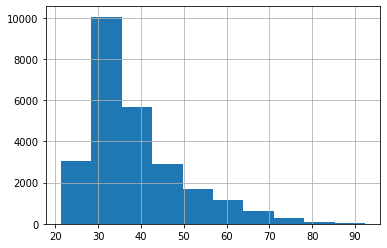

In [57]:
import matplotlib.pyplot as mpl

merge_final['age'].hist()

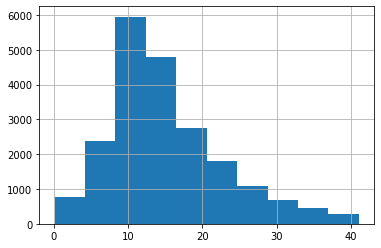

In [58]:
merge_final['workyear'].hist()

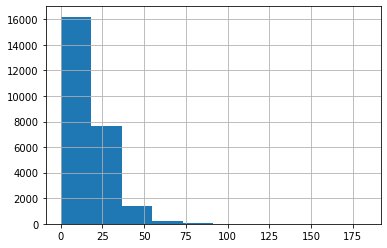

In [59]:
merge_final['seniority'].hist()

## Build a model

In [105]:
XY = merge_train.dropna()

In [106]:
# Choose X variables other than age
X = XY.loc[:, XY.columns!='age']
 
# also exclude user_id because these are strings.
X = X.loc[:, X.columns!='user_id']

#target variable is age
Y = XY['age']

In [74]:
#X = X.drop(columns=['years_since_bachelor','school_startdate', 'school_enddate', 'work_startdate', 'work_enddate']) 

In [107]:
X 

,workyear,seniority
0,14.049315,19.585092
1,37.479452,36.921271
2,15.550685,13.962989
4,17.465753,8.792237
5,11.8,16.384932
...,...,...
25529,20.30137,15.551945
25531,19.972603,16.970875
25532,17.29863,17.217123
25533,11.210959,15.606050


In [76]:
Y.shape

(21006,)

In [77]:
Y

0         39.30137
1        60.317808
2         32.29863
4         43.30411
5         33.29863
           ...    
25529     41.30411
25531    47.306849
25532    47.306849
25533     36.30137
25534    27.293151
Name: age, Length: 21006, dtype: object

In [78]:
# randomly assign some data to the test-set and the rest to the training-set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [79]:
X_train

,seniority,workyear
5745,50.277251,18.136986
10278,13.216438,8.460274
6838,2.935470,8.964384
10855,11.586700,15.213699
1069,59.704588,40.315068
...,...,...
15250,52.173755,18.216438
19510,41.639434,22.139726
12095,20.823857,35.312329
18030,12.953412,16.676712


In [80]:
Y_train

5745      41.30411
10278     28.29589
6838      28.29589
10855    49.309589
1069     62.317808
           ...    
15250     38.30137
19510     38.30137
12095    58.315068
18030    46.306849
10905     38.30137
Name: age, Length: 16804, dtype: object

In [69]:
X_train.shape

(16804, 6)

In [70]:
Y_train.shape

(16804,)

### Linear Regression 

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

kfold = 5

lr = LinearRegression()
lr.fit(X_train, Y_train)

ols = np.mean(cross_val_score(lr, X_train, Y_train, cv=kfold, scoring="r2"))


#training and test scores
print("Training r2 Score: {:.2f}".format(lr.score(X_train, Y_train)))
print("Test r2 Score: {:.2f}".format(lr.score(X_test, Y_test)))

# Kfold cross validation
print("KFold Cross Validation:{:.2f}".format(ols))

Training r2 Score: 0.50
Test r2 Score: 0.49
KFold Cross Validation:0.50


In [109]:
lr.coef_

array([-0.09349772,  0.98540349])

In [110]:
#Predictions 

pred_Y_test = lr.predict(X_test)



In [111]:
Y_test.shape

(4202,)

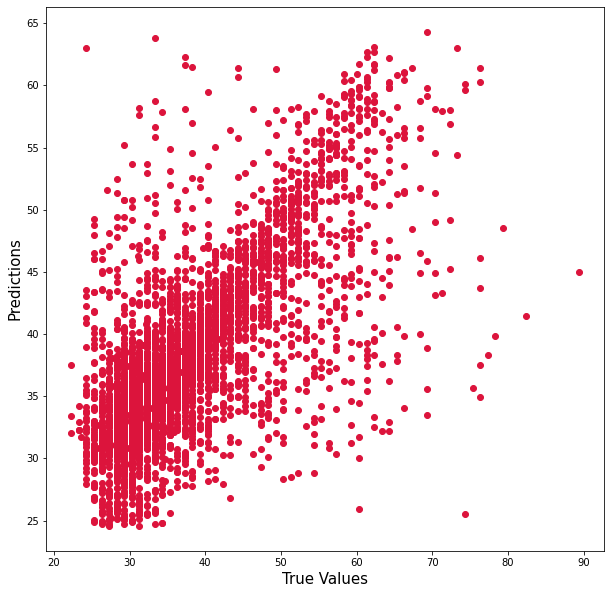

In [112]:
#There is a direct relationship between the two variables, which means model predicts accurately.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(Y_test, pred_Y_test, c='crimson')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()

### Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#forest_params = [{'max_depth': list(range(10, 15)), 'n_estimators': [100,200,300], }] #max_feature
"""
param_grid = {
    'bootstrap': [True],
    'max_depth' : [4,5,6,7,8], #'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300] 
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}
"""

clf = RandomForestRegressor(n_estimators = 100, random_state = 10, max_depth = 10)

clf.fit(X_train, Y_train)

#clf = RandomForestRegressor()
#clf = GridSearchCV(clf, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, Y_train)

#print(clf.best_params_)

#print(clf.best_score_)



#training and test scores
print("Training r2 Score: {:.2f}".format(clf.score(X_train, Y_train)))
print("Test r2 Score: {:.2f}".format(clf.score(X_test, Y_test)))


clf_cv = np.mean(cross_val_score(clf, X_train, Y_train, cv=5 ))


# Kfold cross validation
print("KFold Cross Validation:{:.2f}".format(clf_cv))

Training r2 Score: 0.64
Test r2 Score: 0.49
KFold Cross Validation:0.51


In [114]:
clf_Y_test = clf.predict(X_test)

from sklearn.metrics import r2_score

r2_score(Y_test,clf_Y_test)

# Calculate the absolute errors
#errors = abs(prediction_s - Y_test)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors_s), 2), 'degrees.')



0.49375888152664504

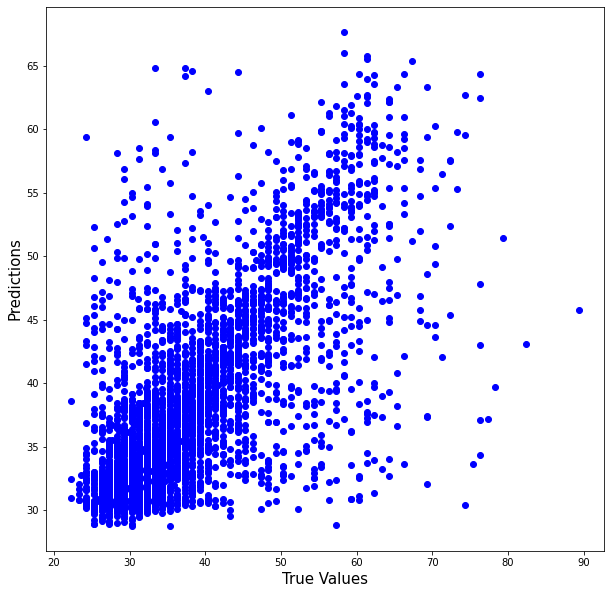

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(Y_test, clf_Y_test, c='blue')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()

### prediction with a new input dataset

In [116]:
#try to predict the age using a new input(a pre-made dataset that has unused user_ids for age calculation)

X_new = merge_other_job_pos[['seniority','workyear']]

Y_new_pred = lr.predict(X_new)


In [117]:
merge_other_job_pos['age'] = Y_new_pred

In [ ]:
merge_other_job_pos['true_or_predicted'] = 'predicted'
merge_other_job_pos

In [119]:
merge_train['true_or_predicted'] = 'true'
merge_train

,user_id,workyear,seniority,age,true_or_predicted
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,14.049315,19.585092,39.30137,true
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,37.479452,36.921271,60.317808,true
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,15.550685,13.962989,32.29863,true
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,NaN,11.534890,29.29589,true
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,17.465753,8.792237,43.30411,true
...,...,...,...,...,...
25531,zOmkQXgpXeuNdLPP33grMw5+2cvffV/mNepQVJd0smgtpB...,19.972603,16.970875,47.306849,true
25532,jRp0G2i8/xctae8mqJMTT2EeezRFo+61bQ/jHgHWG0kf/b...,17.29863,17.217123,47.306849,true
25533,P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpB...,11.210959,15.606050,36.30137,true
25534,TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpB...,15.884932,11.443072,27.293151,true


In [120]:
merge_true_predict = pd.concat([merge_train, merge_other_job_pos])
merge_true_predict.index = range(len(merge_true_predict))
merge_true_predict

,user_id,workyear,seniority,age,true_or_predicted
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,14.049315,19.585092,39.30137,true
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,37.479452,36.921271,60.317808,true
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,15.550685,13.962989,32.29863,true
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,NaN,11.534890,29.29589,true
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,17.465753,8.792237,43.30411,true
...,...,...,...,...,...
77057,zzP7zTK3JaSeTqz9AtikLg5+2cvffV/mNepQVJd0smgtpB...,8.964384,22.559653,31.565789,predicted
77058,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,30.60274,16.159846,53.486668,predicted
77059,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,17.717808,14.064917,40.985683,predicted
77060,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,30.309589,4.610625,54.277622,predicted


In [121]:
finaldata = merge_true_predict[['user_id','age', 'true_or_predicted']]
finaldata

,user_id,age,true_or_predicted
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,39.30137,true
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,60.317808,true
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,32.29863,true
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,29.29589,true
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,43.30411,true
...,...,...,...
77057,zzP7zTK3JaSeTqz9AtikLg5+2cvffV/mNepQVJd0smgtpB...,31.565789,predicted
77058,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,53.486668,predicted
77059,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,40.985683,predicted
77060,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,54.277622,predicted
